In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
traindf = pd.read_csv('/content/drive/MyDrive/train.csv')
testdf = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train = traindf.drop('ID',axis=1)
test = testdf.drop('ID',axis=1)
# train = traindf
# test = testdf

In [ ]:
train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
df=dataset.drop('Is_Lead',axis=1)

In [ ]:

num_cols = df.dtypes[df.dtypes != np.object].index.values.tolist()
for c in num_cols:
  df[c] = np.log(df[c])

df['Is_Lead'] = dataset.Is_Lead

In [ ]:
train_df = df[:train_objs_num]
test_df = df[train_objs_num:]

In [ ]:
len(train_df)

245725

In [ ]:
# sns.distplot(np.exp(df.Age))

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(train_df.Avg_Account_Balance))
jj  = pd.DataFrame(np.where(z < 3,train_df.Avg_Account_Balance,np.nan),columns=['Avg_Account_Balance'])

In [ ]:
jj['Avg_Account_Balance'].values

In [ ]:
train_df.is_copy = False


In [ ]:
train_df.loc[:, ['Avg_Account_Balance']] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_df.dropna(subset = ['Avg_Account_Balance'],inplace=True)

In [ ]:

# num_cols = df.dtypes[df.dtypes != np.object].index.values.tolist()
# for c in num_cols:
#   sns.boxplot(df[c])
#   plt.show()

In [ ]:
#@title imputer function

#@ Imputer function
# import numpy as np
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import MinMaxScaler


# mm = MinMaxScaler()

# def find_category_mappings(df, variable):
#     return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

# def integer_encode(df , variable, ordinal_mapping):
#     df[variable] = df[variable].map(ordinal_mapping)

# mappin = dict()
# def imputation(df1 , cols):
#     df = df1.copy()
#     #Encoding dict &amp; Removing nan    
#     #mappin = dict()
#     for variable in cols:
#         mappings = find_category_mappings(df, variable)
#         mappin[variable] = mappings

#     #Apply mapping
#     for variable in cols:
#         integer_encode(df, variable, mappin[variable])  

#     #Minmaxscaler and KNN imputation 
#     sca = mm.fit_transform(df)
#     knn_imputer = KNNImputer()
#     knn = knn_imputer.fit_transform(sca)
#     df.iloc[:,:] = mm.inverse_transform(knn)
#     for i in df.columns : 
#         df[i] = round(df[i]).astype('int')

#     #Inverse transform
#     for i in cols:
#         inv_map = {v: k for k, v in mappin[i].items()}
#         df[i] = df[i].map(inv_map)
#     return df

In [ ]:
#@title Default title text
# train_objs_num = len(train)
# dataset = pd.concat(objs=[train, test], axis=0)
# df = dataset.drop('Is_Lead',axis=1)
# df.head()
# df1 = imputation(df,['Credit_Product','Gender','Region_Code','Occupation','Channel_Code','Is_Active'])
# df1['Is_Lead'] = dataset['Is_Lead']

# train_new = df2[:train_objs_num]
# test_new = df2[train_objs_num:]

# test_new.to_csv('test_new.csv',index=False)

In [ ]:
#@title Default title text
# # train_objs_num = len(train)
# # dataset = pd.concat(objs=[train, test], axis=0)
# dataset_preprocessed = pd.get_dummies(df2,drop_first=True,dummy_na =True)
# train_preprocessed = dataset_preprocessed[:train_objs_num]
# test_preprocessed = dataset_preprocessed[train_objs_num:]

# Xtrain= train_preprocessed.drop('Is_Lead',axis=1)
# Xtest = test_preprocessed.drop('Is_Lead',axis=1)
# ytrain = train_preprocessed['Is_Lead']

In [ ]:
#@title Default title text
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model = model.fit(Xtrain,ytrain)
# pred = model.predict(Xtest)

In [ ]:
!pip install  keras-tuner

In [ ]:

import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=512,
                                            step=16),
                               activation='relu'))
    model.add(layers.Dense(1, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='project1',
    project_name='CustomerBank')

In [ ]:
train_objs_num = len(train_df)
dataset = pd.concat(objs=[train_df, test_df], axis=0,ignore_index=True)
dataset_preprocessed = pd.get_dummies(dataset,drop_first=True)
train_preprocessed = dataset_preprocessed[:train_objs_num]
test_preprocessed = dataset_preprocessed[train_objs_num:]

In [ ]:
Xtrain= train_preprocessed.drop('Is_Lead',axis=1)
Xtest = test_preprocessed.drop('Is_Lead',axis=1)
ytrain = train_preprocessed['Is_Lead']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.20, random_state=4)

In [ ]:

tuner.search(X_train, y_train,
             epochs=2,
             validation_data=(X_test, y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
num_layers        |5                 |?                 
units_0           |176               |?                 
units_1           |240               |?                 
learning_rate     |0.001             |?                 

Epoch 1/2
6110/6110 [==============================] - 17s 3ms/step - loss: 0.4766 - accuracy: 0.2375 - val_loss: 0.4649 - val_accuracy: 0.2366
Epoch 2/2
3499/6110 [================>.............] - ETA: 5s - loss: 0.4640 - accuracy: 0.2392

KeyboardInterrupt: ignored

In [ ]:
tuner_best = tuner.get_best_models(num_models=1)
model = tuner_best[0]

In [ ]:
pred = model.predict(Xtest)

In [ ]:
result = pd.DataFrame(testdf.ID,columns=['ID'])

result['Is_Lead'] = pred
result.head()

,ID,Is_Lead
0,VBENBARO,NaN
1,CCMEWNKY,NaN
2,VK3KGA9M,NaN
3,TT8RPZVC,NaN
4,SHQZEYTZ,NaN


In [ ]:
# result.Is_Lead = result.Is_Lead.map(lambda x: 0 if x<= 0.5 else 1)
# result.head()

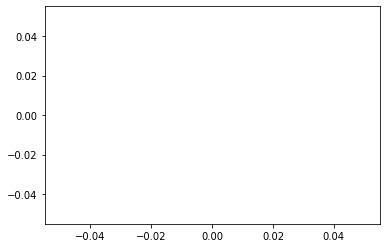

In [ ]:
plt.plot(pred)

In [ ]:
result.to_csv('result3.csv',index=False)